# Handwritten Digit Classifier

In this project, we'll explore the effectiveness of deep,
feedforward neural networks at classifying images. We'll be using the
[Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)
of UCI which contains handwritten images of digits of 8x8 pixels.

The objective of this project is to explore the capabilities of neural networks
and determine what makes them the best model choice for image classification.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
digits_df = pd.DataFrame(digits['data'])
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Visualize Images

In [12]:
def reshape(pixels):
    image = pixels.values.reshape(8,8)
    return image

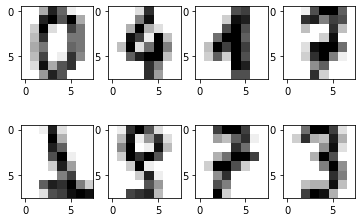

In [25]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].imshow(reshape(digits_df.iloc[0]), cmap='gray_r')
axs[0, 1].imshow(reshape(digits_df.iloc[100]), cmap='gray_r')
axs[0, 2].imshow(reshape(digits_df.iloc[200]), cmap='gray_r')
axs[0, 3].imshow(reshape(digits_df.iloc[300]), cmap='gray_r')

axs[1, 0].imshow(reshape(digits_df.iloc[1000]), cmap='gray_r')
axs[1, 1].imshow(reshape(digits_df.iloc[1100]), cmap='gray_r')
axs[1, 2].imshow(reshape(digits_df.iloc[1200]), cmap='gray_r')
axs[1, 3].imshow(reshape(digits_df.iloc[1300]), cmap='gray_r')

## K Nearest Neighbors

The k-nearest neighbors algorithm compares every unseen observation in the test set
to all (or many, as some implementations constrain the search space) training
observations to look for similar (or the "nearest") observations. We'll evaluate
the performance of the algorithm classifying images to have a reference point.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors =  [5,10,15,40,50,100]
model_scores = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn,
                    digits_df,
                    digits['target'],
                    scoring='accuracy',
                    cv = 4)
    model_scores.append(np.mean(scores))

Text(0, 0.5, 'Accuracy')

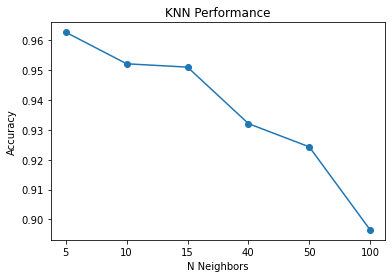

In [50]:
xlabels = list(map(str, neighbors))
plt.plot(xlabels, model_scores, marker='o')
plt.title('KNN Performance')
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')

There are some drawbacks in applying KNN:
* High memory usage
* No model to debug or optimize

## Neural Networks

### Single Hidden Layer

We will start with a single hidden layer and a variety of nodes and then
keep adding layers.

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

In [ ]:
nodes = [8,16,24,32,64,128]
nn_scores_testing = []
nn_scores_train = []

for n in nodes:
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    scores = cross_validate(mlp,
                    digits_df,
                    digits['target'],
                    scoring='accuracy',
                    return_train_score=True,
                    cv = 4)
    nn_scores_testing.append(np.mean(scores['test_score']))
    nn_scores_train.append(np.mean(scores['train_score']))

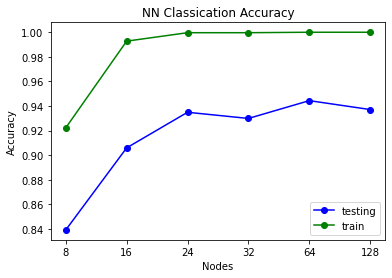

In [61]:
x_nodes = list(map(str, nodes))
plt.plot(x_nodes, nn_scores_testing, color='blue',marker='o', label='testing')
plt.plot(x_nodes, nn_scores_train, color='green',marker='o', label='train')
plt.legend(loc="lower right")
plt.title('NN Classication Accuracy')
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.show()

There seems to be a notable increment in the predictive power of the model
from 8 to 16 nodes and then a marginal increment from there on. The best performing
model had an accuracy of about 94.4% and that was achieved with 64 nodes. An accuracy
of near 100% on the training set hints that the model may be overfitting.

### Two Hidden Layers
64 nodes yielded the best result in accuracy therefore we'll keep this parameter
value for our two layer neural network.

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64))
two_layer_scores = cross_validate(mlp,
                    digits_df,
                    digits['target'],
                    scoring='accuracy',
                    return_train_score=True,
                    cv = 4)

two_layer_train = np.mean(two_layer_scores['train_score'])
two_layer_test = np.mean(two_layer_scores['test_score'])
print('Training dataset accuracy {}'.format(two_layer_train))
print('Testing dataset accuracy {}'.format(two_layer_test))

Training dataset accuracy 1.0
Testing dataset accuracy 0.9382232120762187


The accuracy of the model after adding a second hidden layer stayed around 94%.
We'll keep increasing the number of layers to see what happens.

Using more hidden layers is known to increase the amount of overfitting
that happens. To help us prevent overfitting, we'll increase the number of folds
we use for k-fold cross validation to 8 while testing networks with 3 hidden layers.

### Three Hidden Layers

c:\users\pcemilio\pycharmprojects\dash\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pcemilio\pycharmprojects\dash\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pcemilio\pycharmprojects\dash\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pcemilio\pycharmprojects\dash\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

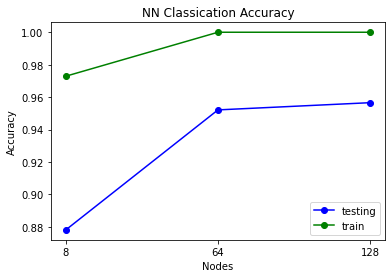

In [3]:
nodes = [8,64,128]
nn_scores_testing = []
nn_scores_train = []

for n in nodes:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    scores = cross_validate(mlp,
                    digits_df,
                    digits['target'],
                    scoring='accuracy',
                    return_train_score=True,
                    cv = 8)
    nn_scores_testing.append(np.mean(scores['test_score']))
    nn_scores_train.append(np.mean(scores['train_score']))

x_nodes = list(map(str, nodes))
plt.plot(x_nodes, nn_scores_testing, color='blue',marker='o', label='testing')
plt.plot(x_nodes, nn_scores_train, color='green',marker='o', label='train')
plt.legend(loc="lower right")
plt.title('NN Classication Accuracy')
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.show()

## Conclusion
Using 3 hidden layers improved our simple accuracy to 96%,
even with 6-fold cross validation. This seems to be in line with the research
literature out there about deep neural networks for computer vision.
Having more layers and more neurons tends to improve the network's performance.